<h1 align = "center"> Data Cleansing and Outlier Analysis </h1>
<h2 align = "center"> Group 7 </h2>

In [69]:
##Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cpi
from datetime import date

<h3> Pitching data cleaning: </h3>

In [70]:
pitchingDF = pd.read_csv(r"C:\Users\Josh\Desktop\Jupyter Notebook\Project\joinedPitchingDF.csv",index_col = 0)

In [71]:
pitchingDF.sample(5)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,SH,SF,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName
42444,rosscza01,2013,1,CHN,NL,0,0,10,0,0,...,0.0,0.0,0.0,Zac,Rosscup,Zachary M.,R,L,NaN,Chicago Cubs
9094,sullich02,1931,1,DET,AL,3,2,31,4,2,...,NaN,NaN,NaN,Charlie,Sullivan,Charles Edward,L,R,NaN,Detroit Tigers
19530,sembeca01,1970,1,MON,NL,0,0,5,0,0,...,1.0,0.0,NaN,Carroll,Sembera,Carroll William,R,R,NaN,Montreal Expos
657,shallgu01,1884,1,CN2,AA,11,10,23,23,23,...,NaN,NaN,NaN,Gus,Shallix,August,R,R,NaN,Cincinnati Red Stockings
17628,lindbpa01,1965,1,KC1,AL,0,1,4,0,0,...,NaN,NaN,NaN,Paul,Lindblad,Paul Aaron,L,L,NaN,Kansas City Athletics


In [72]:
##Remove pitchers with no salary data
pitchingDF = pitchingDF.dropna(subset = ['salary'])

In [73]:
pitchingDF.sample(5)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,SH,SF,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName
28499,heatone01,1992,1,KCA,AL,3,1,31,0,0,...,2.0,3.0,5.0,Neal,Heaton,Neal,L,L,1100000.0,Kansas City Royals
42794,fernajo02,2014,1,MIA,NL,4,2,8,8,0,...,0.0,0.0,2.0,Jose,Fernandez,Jose D.,R,R,635000.0,Miami Marlins
33791,hackmlu01,2001,1,SLN,NL,1,2,35,0,0,...,1.0,0.0,5.0,Luther,Hackman,Luther Gean,R,R,200000.0,St. Louis Cardinals
34710,reynoar02,2002,1,ARI,NL,0,0,2,0,0,...,0.0,0.0,0.0,Armando,Reynoso,Armando Martin,R,R,4125000.0,Arizona Diamondbacks
42116,gregelu01,2013,1,SDN,NL,6,8,73,0,0,...,4.0,1.0,0.0,Luke,Gregerson,Lucas John,L,R,3200000.0,San Diego Padres


<h3> Hitting Data Cleanse </h3>

In [74]:
hittingDF = pd.read_csv(r"C:\Users\Josh\Desktop\Jupyter Notebook\Project\joinedHittingDF.csv",index_col = 0)

In [75]:
hittingDF.sample(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SH,SF,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName
18360,jaegejo01,1920,1,CHN,NL,2,1,0,0,0,...,0.0,NaN,NaN,Joe,Jaeger,Joseph Peter,R,R,NaN,Chicago Cubs
59650,honeyri01,1982,1,TEX,AL,30,0,0,0,0,...,0.0,0.0,0.0,Rick,Honeycutt,Frederick Wayne,L,L,NaN,Texas Rangers
33943,bloodji01,1949,1,CIN,NL,134,452,40,118,27,...,4.0,NaN,12.0,Jimmy,Bloodworth,James Henry,R,R,NaN,Cincinnati Reds
63527,fischmi01,1986,1,NYA,AL,71,102,9,21,2,...,5.0,1.0,3.0,Mike,Fischlin,Michael Thomas,R,R,200000.0,New York Yankees
24461,walberu01,1931,1,PHA,AL,45,105,6,13,1,...,4.0,NaN,NaN,Rube,Walberg,George Elvin,L,L,NaN,Philadelphia Athletics


In [76]:
hittingDF = hittingDF.dropna(subset = ['salary'])

In [77]:
hittingDF.sample(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SH,SF,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName
85910,wagnebi02,2004,1,PHI,NL,46,2,0,0,0,...,0.0,0.0,0.0,Billy,Wagner,William Edward,L,L,8000000.0,Philadelphia Phillies
101180,swarzan01,2015,1,CLE,AL,10,0,0,0,0,...,0.0,0.0,0.0,Anthony,Swarzak,Anthony Ray,R,R,900000.0,Cleveland Indians
97240,cedenxa01,2013,1,HOU,AL,5,0,0,0,0,...,0.0,0.0,0.0,Xavier,Cedeno,Xavier,L,L,495900.0,Houston Astros
70632,webstle01,1992,1,MIN,AL,53,118,10,33,10,...,2.0,0.0,3.0,Lenny,Webster,Leonard Irell,R,R,115000.0,Minnesota Twins
91974,guerrma02,2009,1,MIN,AL,79,0,0,0,0,...,0.0,0.0,0.0,Matt,Guerrier,Matthew Olson,R,R,1475000.0,Minnesota Twins


<h3> Outlier Analysis: Pitching </h3>

In [78]:
## Add Inflation Values
real_salary_list = []

for i in range(len(pitchingDF)):
    real_salary = cpi.inflate(pitchingDF.iloc[i].salary, pitchingDF.iloc[i].yearID, to=2016)
    real_salary = round(real_salary)
    real_salary_list.append(real_salary)

pitchingDF['RealSalary'] = real_salary_list
pitchingDF.sample(5)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,SF,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName,RealSalary
33433,serafda01,2000,1,SDN,NL,0,0,3,0,0,...,0.0,0.0,Dan,Serafini,Daniel Joseph,B,L,230000.0,San Diego Padres,320567
32869,wellsda01,1999,1,TOR,AL,17,10,34,34,7,...,6.0,19.0,David,Wells,David Lee,L,L,4816667.0,Toronto Blue Jays,6938978
29217,rojasme01,1993,1,MON,NL,5,8,66,0,0,...,6.0,9.0,Mel,Rojas,Melquiades,R,R,300000.0,Montreal Expos,498284
35530,wellsda01,2003,1,NYA,AL,15,7,31,30,4,...,7.0,18.0,David,Wells,David Lee,L,L,3250000.0,New York Yankees,4239254
33375,reichda01,2000,1,KCA,AL,8,10,44,18,1,...,7.0,28.0,Dan,Reichert,Daniel Robert,R,R,205000.0,Kansas City Royals,285723


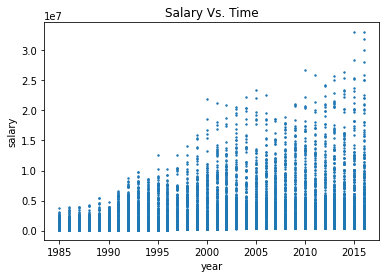

In [79]:
##Visualize how time impacts salary
plt.scatter(pitchingDF.yearID, pitchingDF.RealSalary, s = 2)
plt.title('Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("salary")

plt.show()


In [80]:
yearlyPitchingDF = pitchingDF.groupby(by = 'yearID')

In [81]:
DescriptivePitchingSalaryDF = yearlyPitchingDF.RealSalary.mean().reset_index()
DescriptivePitchingSalaryDF

,yearID,RealSalary
0,1985,1.020506e+06
1,1986,8.454032e+05
2,1987,8.666256e+05
3,1988,8.888297e+05
4,1989,9.369139e+05
5,1990,9.193513e+05
6,1991,1.545096e+06
7,1992,1.833254e+06
8,1993,1.606156e+06
9,1994,1.580329e+06


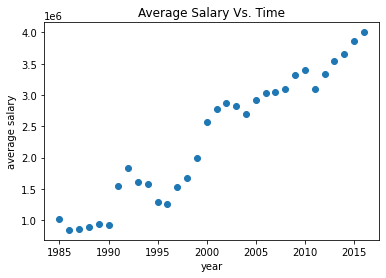

In [82]:
##visualize average salary over the years
plt.scatter(DescriptivePitchingSalaryDF.yearID, DescriptivePitchingSalaryDF.RealSalary)
plt.title('Average Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("average salary")

plt.show()

In [83]:
##Determine when to cutoff salary
cutOffDate = 2003

In [84]:
##remove pitchers from before cut off date
pitchingDF = pitchingDF[pitchingDF.yearID >= cutOffDate]

In [85]:
pitchingDF.sample(5)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,SF,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName,RealSalary
40540,cecilbr01,2011,1,TOR,AL,4,11,20,20,2,...,5.0,5.0,Brett,Cecil,Brett Aarion,R,L,443100.0,Toronto Blue Jays,472782
39792,bergmja01,2010,1,WAS,NL,0,1,4,0,0,...,0.0,0.0,Jason,Bergmann,Jason Chris,R,R,750000.0,Washington Nationals,825500
44291,cosarja01,2016,1,MIA,NL,0,1,4,4,0,...,1.0,3.0,Jarred,Cosart,Jarred Lynn,R,R,550000.0,Miami Marlins,550000
43092,parnebo01,2014,1,NYN,NL,0,0,1,0,0,...,0.0,0.0,Bobby,Parnell,Robert Allen,R,R,3700000.0,New York Mets,3751123
37988,martito02,2007,1,COL,NL,0,0,26,0,0,...,0.0,1.0,Tom,Martin,Thomas Edgar,L,L,700000.0,Colorado Rockies,810279


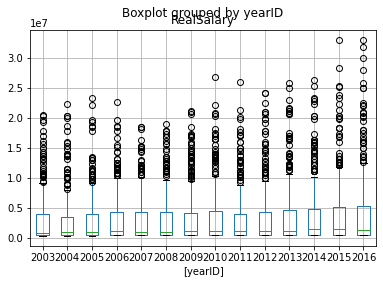

In [86]:
##create boxplot
pitchingDF[['yearID','RealSalary']].boxplot(by='yearID')
plt.show()

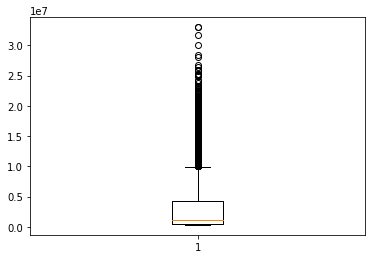

In [87]:
##Boxplot
plt.boxplot(pitchingDF.RealSalary)
plt.show()

In [88]:
##data is highly skewed, introduce Log transform
pitchingDF["LogSalary"] = np.log(pitchingDF.loc[:,"RealSalary"])


C:\Users\Josh\AppData\Local\Temp/ipykernel_21620/314149941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitchingDF["LogSalary"] = np.log(pitchingDF.loc[:,"RealSalary"])


In [89]:
pitchingDF.sample(5)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName,RealSalary,LogSalary
36567,kooda01,2005,1,NYN,NL,0,0,33,0,0,...,0.0,Dae-Sung,Koo,Dae-Sung,L,L,450000.0,New York Mets,553012,13.223135
39889,delcama01,2010,1,BOS,AL,3,2,48,0,0,...,1.0,Manny,Delcarmen,Manuel,R,R,905000.0,Boston Red Sox,996103,13.811606
36080,riedljo01,2004,1,CIN,NL,5,3,70,0,0,...,9.0,John,Riedling,John Richard,R,R,650000.0,Cincinnati Reds,825858,13.624178
38051,nunezle01,2007,1,KCA,AL,2,4,13,6,0,...,4.0,Juan Carlos,Oviedo,Juan Carlos,R,R,382000.0,Kansas City Royals,442181,12.999475
40522,cainma01,2011,1,SFN,NL,12,11,33,33,1,...,7.0,Matt,Cain,Matthew Thomas,R,R,7333333.0,San Francisco Giants,7824571,15.872779


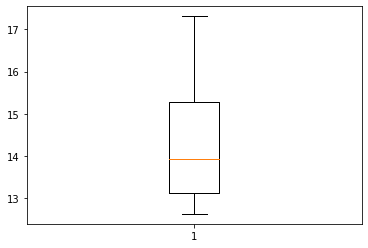

In [90]:
##View Boxplot with log data
plt.boxplot(pitchingDF.LogSalary)
plt.show()

In [91]:
##remove outliers (Baseball has a min salary)
q1p = pitchingDF.LogSalary.quantile(0.25)
q3p = pitchingDF.LogSalary.quantile(0.75)
IQRp = q3p - q1p
maxSal = IQRp*1.5 + q3p

In [92]:
pitchingDF = pitchingDF[pitchingDF.LogSalary <= maxSal]

In [93]:
pitchingDF

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName,RealSalary,LogSalary
34894,aceveju01,2003,1,NYA,AL,0,3,25,0,0,...,0.0,Juan,Acevedo,Juan Carlos,R,R,900000.0,New York Yankees,1173947,13.975882
34896,adamste01,2003,1,PHI,NL,1,4,66,0,0,...,11.0,Terry,Adams,Terry Wayne,R,R,2900000.0,Philadelphia Phillies,3782719,15.145954
34898,affelje01,2003,1,KCA,AL,7,6,36,18,0,...,12.0,Jeremy,Affeldt,Jeremy David,L,L,313000.0,Kansas City Royals,408273,12.919691
34899,ainswku01,2003,1,SFN,NL,5,4,11,11,0,...,5.0,Kurt,Ainsworth,Kurt Harold,R,R,302000.0,San Francisco Giants,393925,12.883916
34901,alfonan01,2003,1,CHN,NL,3,1,60,0,0,...,9.0,Antonio,Alfonseca,Antonio,R,R,4000000.0,Chicago Cubs,5217543,15.467537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44957,yateski01,2016,1,NYA,AL,2,1,41,0,0,...,1.0,Kirby,Yates,Kirby Kali,L,R,511900.0,New York Yankees,511900,13.145885
44960,youngch03,2016,1,KCA,AL,3,9,34,13,0,...,3.0,Chris,Young,Christopher Ryan,R,R,4250000.0,Kansas City Royals,4250000,15.262430
44963,zieglbr01,2016,1,ARI,NL,2,3,36,0,0,...,10.0,Brad,Ziegler,Brad Gregory,R,R,5500000.0,Arizona Diamondbacks,5500000,15.520259
44965,zimmejo02,2016,1,DET,AL,9,7,19,18,0,...,8.0,Jordan,Zimmermann,Jordan M.,R,R,18000000.0,Detroit Tigers,18000000,16.705882


<h3> Outlier Analysis: Hitting </h3>

In [94]:
##Remove Pitchers from the data set (Historically bad at hitting)
##Need to recreate the original pitching data
pitchersDF = pd.read_csv(r"C:\Users\Josh\Desktop\Jupyter Notebook\Project\joinedPitchingDF.csv",index_col = 0)

booleanPitchers = ~hittingDF.playerID.isin(pitchingDF.playerID)

In [95]:
hittingDF = hittingDF.loc[booleanPitchers == True]

In [96]:
hittingDF.sample(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SH,SF,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName
73752,parrajo01,1995,1,LAN,NL,8,0,0,0,0,...,2.0,0.0,0.0,Jose,Parra,Jose Miguel,R,R,109000.0,Los Angeles Dodgers
77450,monahsh01,1998,1,SEA,AL,62,211,17,51,8,...,4.0,0.0,0.0,Shane,Monahan,Shane Hartland,L,R,170000.0,Seattle Mariners
76112,martiti02,1997,1,NYA,AL,158,594,96,176,31,...,0.0,13.0,15.0,Tino,Martinez,Constantino,L,R,4400000.0,New York Yankees
90980,napolmi01,2008,1,LAA,AL,78,227,39,62,9,...,1.0,6.0,3.0,Mike,Napoli,Michael Anthony,R,R,425000.0,Los Angeles Angels of Anaheim
102053,kinslia01,2016,1,DET,AL,153,618,117,178,29,...,0.0,3.0,5.0,Ian,Kinsler,Ian Michael,R,R,14000000.0,Detroit Tigers


In [97]:
## Add Inflation Values
real_salary_list = []

for i in range(len(hittingDF)):
    real_salary = cpi.inflate(hittingDF.iloc[i].salary, hittingDF.iloc[i].yearID, to=2016)
    real_salary = round(real_salary)
    real_salary_list.append(real_salary)

hittingDF['RealSalary'] = real_salary_list
hittingDF.sample(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SF,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName,RealSalary
79756,hamiljo02,2000,1,TOR,AL,6,0,0,0,0,...,0.0,0.0,Joey,Hamilton,Johns Joseph,R,R,5500000.0,Toronto Blue Jays,7665729
68601,belchti01,1991,1,LAN,NL,33,67,3,8,2,...,0.0,1.0,Tim,Belcher,Timothy Wayne,R,R,900000.0,Los Angeles Dodgers,1585949
71942,blackbu02,1994,1,SFN,NL,10,17,0,1,0,...,0.0,0.0,Buddy,Black,Harry Ralston,L,L,3250000.0,San Francisco Giants,5263311
94396,cabreme01,2011,1,KCA,AL,155,658,102,201,44,...,5.0,12.0,Melky,Cabrera,Melky,B,L,1250000.0,Kansas City Royals,1333734
76420,servasc01,1997,1,CHN,NL,122,385,36,100,21,...,3.0,7.0,Scott,Servais,Scott Daniel,R,R,1370000.0,Chicago Cubs,2048658


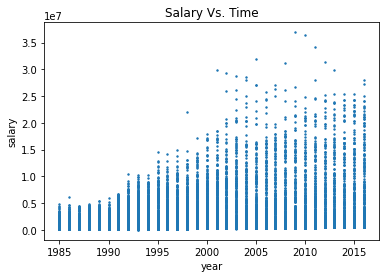

In [98]:
##Visualize Salary as a function of time
plt.scatter(hittingDF.yearID, hittingDF.RealSalary, s = 2)
plt.title('Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("salary")

plt.show()

In [99]:
yearlyHittingDF = hittingDF.groupby(by = 'yearID')

In [100]:
DescriptiveHittingSalaryDF = yearlyHittingDF.RealSalary.mean().reset_index()
DescriptiveHittingSalaryDF

,yearID,RealSalary
0,1985,1.065912e+06
1,1986,9.164423e+05
2,1987,9.108601e+05
3,1988,9.358823e+05
4,1989,9.910782e+05
5,1990,1.005638e+06
6,1991,1.610211e+06
7,1992,1.861179e+06
8,1993,1.687563e+06
9,1994,1.732453e+06


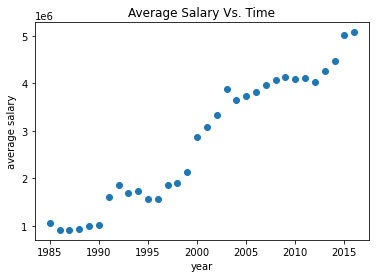

In [101]:
plt.scatter(DescriptiveHittingSalaryDF.yearID, DescriptiveHittingSalaryDF.RealSalary)
plt.title('Average Salary Vs. Time')
plt.xlabel("year")
plt.ylabel("average salary")

plt.show()

In [102]:
##remove pitchers from before cut off date
hittingDF = hittingDF[hittingDF.yearID >= cutOffDate]

In [66]:
hittingDF

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SF,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName,RealSalary
83309,abernbr01,2003,1,TBA,AL,2,7,1,0,0,...,0.0,0.0,Brent,Abernathy,Michael Brent,R,R,300000.0,Tampa Bay Devil Rays,391316
83311,abreubo01,2003,1,PHI,NL,158,577,99,173,35,...,7.0,13.0,Bobby,Abreu,Bob Kelly,L,R,9100000.0,Philadelphia Phillies,11869911
83321,alfoned01,2003,1,SFN,NL,142,514,56,133,25,...,7.0,14.0,Edgardo,Alfonzo,Edgardo Antonio,R,R,4000000.0,San Francisco Giants,5217543
83329,alomaro01,2003,1,NYN,NL,73,263,34,69,17,...,4.0,8.0,Roberto,Alomar,Roberto,B,R,8000000.0,New York Mets,10435087
83331,alomasa02,2003,1,CHA,AL,75,194,22,52,12,...,1.0,4.0,Sandy,Alomar,Santos,R,R,700000.0,Chicago White Sox,913070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102809,wrighda03,2016,1,NYN,NL,37,137,18,31,8,...,0.0,0.0,David,Wright,David Allen,R,R,19364801.0,New York Mets,19364801
102815,yelicch01,2016,1,MIA,NL,155,578,78,172,38,...,5.0,20.0,Christian,Yelich,Christian Stephen,L,R,1000000.0,Miami Marlins,1000000
102820,youngch04,2016,1,BOS,AL,76,203,29,56,18,...,0.0,4.0,Chris,Young,Christopher Brandon,R,R,6500000.0,Boston Red Sox,6500000
102827,zimmery01,2016,1,WAS,NL,115,427,60,93,18,...,6.0,12.0,Ryan,Zimmerman,Ryan Wallace,R,R,14000000.0,Washington Nationals,14000000


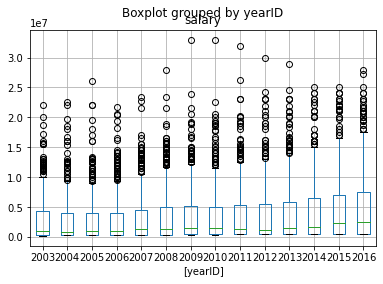

In [103]:
##create boxplot
hittingDF[['yearID','salary']].boxplot(by='yearID')
plt.show()

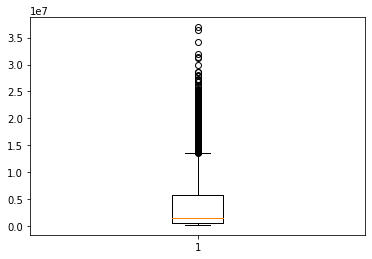

In [108]:
plt.boxplot(hittingDF.RealSalary)
plt.show()

In [105]:
##data is highly skewed, introduce Log transform
hittingDF["LogSalary"] = np.log(hittingDF.loc[:,"RealSalary"])

C:\Users\Josh\AppData\Local\Temp/ipykernel_21620/789934765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hittingDF["LogSalary"] = np.log(hittingDF.loc[:,"RealSalary"])


In [107]:
hittingDF.sample(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName,RealSalary,LogSalary
84852,cashke01,2004,1,TOR,AL,60,181,18,35,9,...,3.0,Kevin,Cash,Kevin Forrest,R,R,302000.0,Toronto Blue Jays,383706,12.857632
92535,riggash01,2009,1,TBA,AL,7,14,2,2,0,...,1.0,Shawn,Riggans,Shawn Willis,R,R,413900.0,Tampa Bay Rays,463039,13.045567
89532,michaja01,2007,1,CLE,AL,105,267,43,72,11,...,3.0,Jason,Michaels,Jason Drew,R,R,2050000.0,Cleveland Indians,2372960,14.679649
99605,satinjo01,2014,1,NYN,NL,25,35,2,3,2,...,2.0,Josh,Satin,Joshua Blake,R,R,506809.0,New York Mets,513812,13.149613
94711,guerrvl01,2011,1,BAL,AL,145,562,60,163,30,...,23.0,Vladimir,Guerrero,Vladimir,R,R,7611455.0,Baltimore Orioles,8121324,15.910004


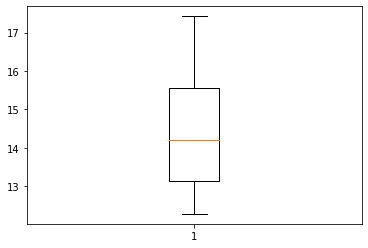

In [109]:
plt.boxplot(hittingDF.LogSalary)
plt.show()

In [110]:
##remove outliers (Baseball has a min salary)
q1h = hittingDF.LogSalary.quantile(0.25)
q3h = hittingDF.LogSalary.quantile(0.75)
IQRh = q3h - q1h
maxSal = IQRh*1.5 + q3h

In [111]:
maxSal

19.19388128902798

In [112]:
hittingDF = hittingDF[hittingDF.LogSalary <= maxSal]

In [113]:
hittingDF.sample(10)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,GIDP,nameFirst,nameLast,nameGiven,bats,throws,salary,teamName,RealSalary,LogSalary
87141,sternad01,2005,1,BOS,AL,36,15,4,2,0,...,0.0,Adam,Stern,Adam James,L,R,316000.0,Boston Red Sox,388337,12.869629
92713,tejadmi01,2009,1,HOU,NL,158,635,83,199,46,...,29.0,Miguel,Tejada,Miguel Odalis,R,R,14811414.0,Houston Astros,16569837,16.623095
91264,sizemgr01,2008,1,CLE,AL,157,634,101,170,39,...,5.0,Grady,Sizemore,Grady,L,L,3166666.0,Cleveland Indians,3530011,15.076812
92208,longoev01,2009,1,TBA,AL,157,584,100,164,44,...,27.0,Evan,Longoria,Evan Michael,R,R,550000.0,Tampa Bay Rays,615296,13.329859
86826,mondera01,2005,1,ATL,NL,41,142,17,30,7,...,5.0,Raul,Mondesi,Raul Ramon,R,R,1000000.0,Atlanta Braves,1228914,14.021641
94001,sizemgr01,2010,1,CLE,AL,33,128,15,27,6,...,1.0,Grady,Sizemore,Grady,L,L,5766666.0,Cleveland Indians,6347178,15.663521
97779,loneyja01,2013,1,TBA,AL,158,549,54,164,33,...,16.0,James,Loney,James Anthony,L,L,2000000.0,Tampa Bay Rays,2060526,14.538472
92744,tuiasma01,2009,1,SEA,AL,7,22,2,5,1,...,0.0,Matt,Tuiasosopo,Matthew Petelu,R,R,400000.0,Seattle Mariners,447488,13.011405
100311,freemfr01,2015,1,ATL,NL,118,416,62,115,27,...,6.0,Freddie,Freeman,Frederick Charles,L,R,8500000.0,Atlanta Braves,8607229,15.968113
91667,cabreas01,2009,1,CLE,AL,131,523,81,161,42,...,13.0,Asdrubal,Cabrera,Asdrubal Jose,B,R,416700.0,Cleveland Indians,466171,13.052308


<h3> Export Data </h3>

In [114]:
finalPitching = pitchingDF
finalHitting = hittingDF

##reset index for formatting
finalPitching = finalPitching.reset_index(drop = True)
finalHitting = finalHitting.reset_index(drop = True)

In [115]:
finalPitching.to_csv(r'C:\Users\Josh\Desktop\Jupyter Notebook\Project\cleansedPitchingDF.csv')

In [116]:
finalHitting.to_csv(r'C:\Users\Josh\Desktop\Jupyter Notebook\Project\cleansedHittingDF.csv')